10.38720768005163 9.162623178232845
Best accuracy is 0.838509


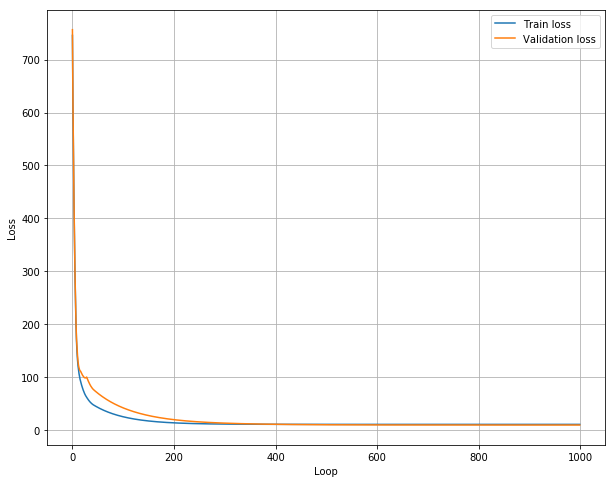

In [7]:
%matplotlib inline
from sklearn import datasets as ds  
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#读取libsvm格式数据  
train_data,train_target=ds.load_svmlight_file("/Users/humeng/Desktop/australian_scale.txt")  
                                       
#调整数据格式
train_target = train_target.reshape(-1, 1)

#避免过拟合，采用交叉验证，验证集占训练集30%，
x_train, x_validation, y_train, y_validation = train_test_split(train_data,train_target,
                                                    test_size=0.3, random_state=0)

#初始化参数b
b1 = np.ones((x_train.shape[0],1))
x_train = np.hstack((x_train.toarray(),b1))
b2 = np.ones((x_validation.shape[0],1))
x_validation = np.hstack((x_validation.toarray(),b2))

#print (x_train.shape,x_validation.shape)

#参数初始化
C = 10
learningrate = 0.008
loop = 1000
w = np.zeros((x_train.shape[1],1))
l_train = []
l_validation = []
best = 0.0

#对loss函数求导
def gradient(w,C,x,y):
    #设立阀值
    condition = 1 - np.multiply(y,np.dot(x,w))
    y[condition < 0] = 0
    #求梯度
    grad = w - C * np.dot(x.T, y)
    #消除参数b的影响
    grad[-1] -= w[-1]
    return grad

#梯度下降
def loss(w,C,x,y):
    hinge = np.maximum(0, 1 - np.multiply(y,np.dot(x,w)))
    l = float(0.5 * np.dot(w.T,w) + C * np.sum(hinge) / x.shape[0])
    return l

#求准确率
def acc(w, x, threshold=0.0):
    score = x.dot(w)
    y_pre = np.ones((x.shape[0], 1))
    y_pre[score < threshold] = -1
    return y_pre

for k in range(loop):
    #求得所有样本对Loss函数的梯度
    grad = gradient(w,C,x_train,y_train)
    w = w - learningrate * grad
    l_train.append(loss(w,C,x_train,y_train))
    l_validation.append(loss(w,C,x_validation,y_validation))
    
    #计算准确率
    y_pre = acc(w, x_train, threshold=0.0)
    a = np.mean(y_pre == y_train)
    if a > best:
        best = a

print(l_train[-1],l_validation[-1])
print('Best accuracy is %f' % (best))

#设置图像
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(np.arange(loop),l_train,label='Train loss')
plt.plot(np.arange(loop),l_validation,label='Validation loss')
plt.xlabel('Loop')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()

plt.show()